In [1]:
pip install shap scikit-learn matplotlib

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     -------------------------------------  102.4/104.0 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 104.0/104.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/489.8 kB ? eta -:--:--
   -------------------------- ------------ 327.7/489.8 kB 21.2 MB/s eta 0:00:01
   ---------------------------------------- 489.8/489.8 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.1 MB 10.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.1 MB 8.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.1 MB 9.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.1 MB 10.1 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [9]:
# Assets and their returns (hypothetical data)
assets = ["Stock A", "Stock B", "Stock C"]
returns = {"Stock A": 0.05, "Stock B": 0.02, "Stock C": 0.03}

# Define the portfolio performance function
def portfolio_return(selected_assets):
    return sum(returns[asset] for asset in selected_assets)

In [10]:
def shapley_attribution(assets, value_function):
    """Compute Shapley values for performance attribution."""
    n = len(assets)
    shapley_values = {asset: 0 for asset in assets}
    
    # Iterate through each asset and compute its marginal contribution
    for asset in assets:
        for S in powerset(set(assets) - {asset}):
            S = set(S)
            weight = np.math.factorial(len(S)) * np.math.factorial(n - len(S) - 1) / np.math.factorial(n)
            marginal_contribution = value_function(S | {asset}) - value_function(S)
            shapley_values[asset] += weight * marginal_contribution
    
    return shapley_values

# Generate all subsets (powerset function)
def powerset(iterable):
    """Generate all subsets of a given set."""
    from itertools import chain, combinations
    s = list(iterable)
    return map(set, chain.from_iterable(combinations(s, r) for r in range(len(s) + 1)))

# Compute Shapley values for asset contribution
shapley_values = shapley_attribution(assets, portfolio_return)

# Display Results
print("Shapley Values (Performance Contribution):")
for asset, value in shapley_values.items():
    print(f"{asset}: {value:.4f}")

Shapley Values (Performance Contribution):
Stock A: 0.0500
Stock B: 0.0200
Stock C: 0.0300


C:\Users\Asus\AppData\Local\Temp\ipykernel_13584\1793164325.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  weight = np.math.factorial(len(S)) * np.math.factorial(n - len(S) - 1) / np.math.factorial(n)


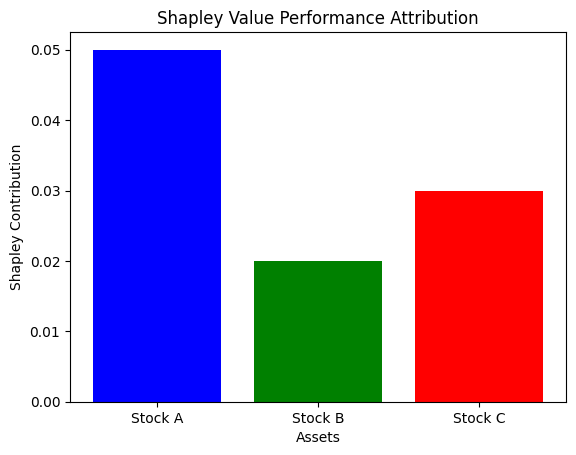

In [11]:
# Plot Shapley Values
plt.bar(shapley_values.keys(), shapley_values.values(), color=['blue', 'green', 'red'])
plt.xlabel("Assets")
plt.ylabel("Shapley Contribution")
plt.title("Shapley Value Performance Attribution")
plt.show()